# Data generation for Figure 1

Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ipywidgets import interact, interactive
import sys

# Imports from epistasis API
from epistasis.plotting import epistasis
from epistasis.stats import pearson
from epistasis.simulate.additive import AdditiveSimulation
from epistasis.simulate.nonlinear import NonlinearSimulation
from epistasis.models.linear import LinearEpistasisModel
from epistasis.models import (LinearEpistasisRegression, NonlinearEpistasisModel)

In [4]:
def power_transform(x, lmbda, A, B):
    gmean = sp.stats.mstats.gmean(x + A)
    if lmbda == 0:
        return gmean*np.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
        return out
    
def reverse_function(y, lmbda, A, B):
    gmean = sp.stats.mstats.gmean(model.statistics.linear()+A)
    return (gmean**(lmbda-1)*lmbda*(y - B) + 1)**(1/lmbda) - A

def function(x, k):
    return ((k+1)*x) / (k*x + 1) 

## Initialize a genotype-phenotype map with epistasis.

In [139]:
initial = AdditiveSimulation.quick_start(5,1, model_type="global", coeff_range=(-.15,.15))
initial.epistasis.values[0] = .5
initial.build()

# Values used in in the paper: 
initial.epistasis.values = np.array([ 0.5, -0.13463125, 0.12698641, 0.02709926, 0.09493059, 0.10254137])

In [145]:
initial.epistasis.values

array([ 0.5       , -0.13463125,  0.12698641,  0.02709926,  0.09493059,
        0.10254137])

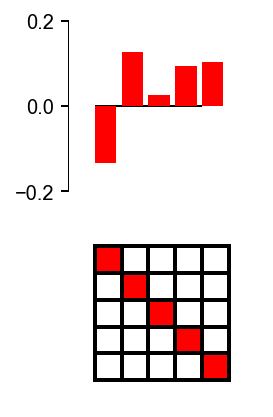

In [146]:
fig, ax = epistasis(initial.epistasis.values, initial.epistasis.labels, 
    figsize=(2,3),
    y_axis_name="",
    height_ratio=1,
)

#fig.savefig(
#    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/additive-coeffs.svg", 
#    format="svg", 
#    bbox_height="tight"
#)

In [141]:
shape = 2
nonlinear = NonlinearSimulation.from_linear(initial, function=function, p0=(shape,))

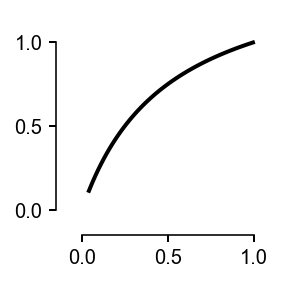

In [147]:
fig, ax = plt.subplots(figsize=[2,2])

x = np.linspace(min(nonlinear.phenotypes),  max(nonlinear.phenotypes), 100)
y = nonlinear.function(x, *nonlinear.parameters.get_params())
ax.plot(x, y, 'k-')
ax.axis([-0.15,1.15,-0.15,1.15])
ax.spines['bottom'].set_bounds(0,1.)
ax.spines['left'].set_bounds(0,1.)
ax.set_xticks([0,.5,1])
fig.savefig("/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/nonlinear-shape.svg", format="svg", bbox_height="tight")

In [ ]:
fig.savefig(
    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/nonlinear-shape.svg", 
    format="svg", 
    bbox_height="tight"
)

In [143]:
model = LinearEpistasisModel.from_gpm(nonlinear, model_type="global")
model.fit()

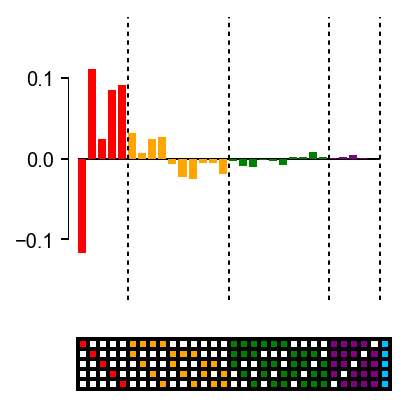

In [148]:
fig, ax = model.plot.epistasis(figsize=(3,3),     
    y_axis_name="",
    height_ratio=4,
)

In [ ]:
fig.savefig(
    "/Users/Zsailer/Dropbox/epistasis-paper/figures/fig-3/linear-fit-coeffs.svg", 
    format="svg", 
    bbox_height="tight"
)